<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/03_Recreate_Graph_Part_1%2C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

**---------------PART 1------------------**

In [15]:
# Load data
df = pd.read_csv('/mortgages.csv')
df

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05


In [12]:
# Getting some information on data set
df.info

<bound method DataFrame.info of       Month  Starting Balance  ...  Mortgage Name  Interest Rate
0         1         400000.00  ...        30 Year           0.03
1         2         399313.58  ...        30 Year           0.03
2         3         398625.44  ...        30 Year           0.03
3         4         397935.58  ...        30 Year           0.03
4         5         397243.99  ...        30 Year           0.03
...     ...               ...  ...            ...            ...
1075    176          15619.91  ...        15 Year           0.05
1076    177          12521.82  ...        15 Year           0.05
1077    178           9410.82  ...        15 Year           0.05
1078    179           6286.86  ...        15 Year           0.05
1079    180           3149.88  ...        15 Year           0.05

[1080 rows x 8 columns]>

1) Create a filter so the Mortgage Name is '30 Year'.  Use the len() to find how many rows correspond to 30 years.


In [9]:
# Code below shows there's 1080 rows with 30 Year Mortgage
mortgage = df['Mortgage Name'] == '30 Year'
len(mortgage)

1080

2) Create a filter for an interest rate of 3% (notice how it is written in the data!).  

In [23]:
int_r3 = df['Interest Rate'] == 0.03
len(int_r)

1080

3) Define a new dataframe based on both the year and the interest filters you have created.  

In [24]:
m30_r3 = df.loc[mortgage & int_r3]
m30_r3.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


4) We have a choice for the 5% interest rate.  We can just create another filter where df.['Interest Rate'] == .05 

In [25]:
int_r5 = df['Interest Rate'] == 0.05
len(int_r5)

1080

In [28]:
m30_r5 = df.loc[mortgage & int_r5]
m30_r5.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


5) Since we want to graph the cumulative sum of the interest paid, you can use the function .cumsum().  What are the first three values in the output for the cumulative sum of the 3% rate?

In [34]:
cumsum_m30_r3 = m30_r3['Interest Paid'].cumsum()
cumsum_m30_r3

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

In [33]:
cumsum_m30_r5 = m30_r5['Interest Paid'].cumsum()
cumsum_m30_r5

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

6) Use plt.plot(x, y, c=color) to plot the black line (5%).  We want the x values to be the ['Month'] and the y values to be the cumulative sum of the Interest Paid.  You can use the code from the previous question to define your y values within the plt.plot() function!  Hint: for black, c = 'k'

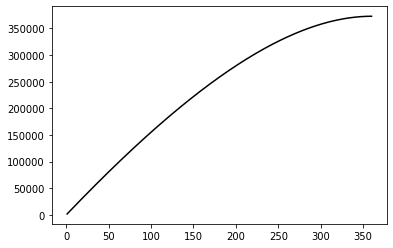

In [31]:
plt.plot(m30_r5['Month'], cumsum_m30_r5, c = 'k');

7) To get both lines on the same graph, just put two plt.plot() functions one after the other in same code block and run it!

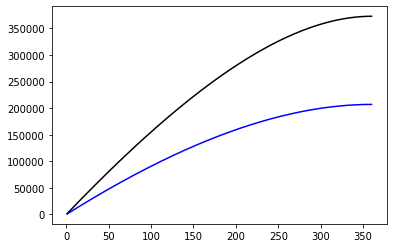

In [35]:
plt.plot(m30_r5['Month'], cumsum_m30_r5, c = 'k');
plt.plot(m30_r3['Month'], cumsum_m30_r3, c = 'b');

**-------------------------PART 2---------------------**

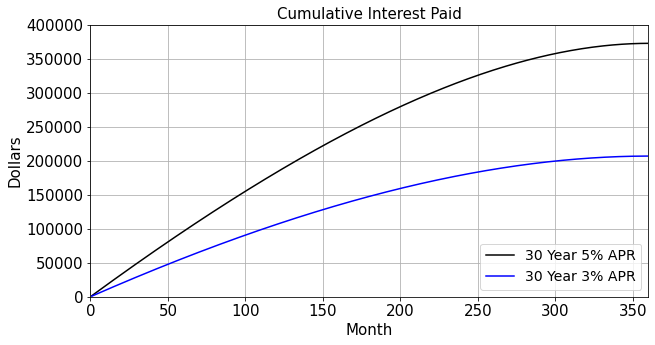

In [89]:
# Setting fig parameters
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5));

# Recreating graphs
plt.plot(m30_r5['Month'], cumsum_m30_r5, c = 'k', label='30 Year 5% APR');
plt.plot(m30_r3['Month'], cumsum_m30_r3, c = 'b', label='30 Year 3% APR');

# Setting axes labels and title
plt.xlabel('Month', fontsize=15)
plt.ylabel('Dollars', fontsize=15)
plt.title('Cumulative Interest Paid', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15) 

# Setting starting limits
plt.ylim([0, 400000])
plt.xlim([0, 360])

# Setting legend
plt.legend(loc='lower right', fontsize=14)

plt.grid()
plt.show()